In [2381]:
import pandas as pd
import seaborn as srn #lib para grafico
import statistics as sts

In [2382]:
dataset = pd.read_csv('./dados/Churn.csv', sep=';') #definir separador
dataset.head()

,X0,X1,X2,X3,X4,X4.1,X6,X7,X8,X9,X10,X11
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [2383]:
dataset.shape

(999, 12)

In [2384]:
dataset.columns = ['id', 'score', 'UF', 'genero', 'idade', 'patrimonio', 'saldo', 'produtos', 'temCartCredito', 'ativo', 'salario', 'saiu']
dataset

,id,score,UF,genero,idade,patrimonio,saldo,produtos,temCartCredito,ativo,salario,saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
994,996,838,SC,Masculino,43,9,12310588,2,1,0,14576583.0,0
995,997,610,SC,Masculino,29,9,0,3,0,1,8391224.0,0
996,998,811,SC,Masculino,44,3,0,2,0,1,7843973.0,0
997,999,587,SC,Masculino,62,7,12128627,1,0,1,677692.0,0


In [2385]:
dataset['temCartCredito'] = dataset['temCartCredito'].astype('boolean')
dataset['ativo'] = dataset['ativo'].astype('boolean')
dataset['saiu'] = dataset['saiu'].astype('boolean')
dataset

,id,score,UF,genero,idade,patrimonio,saldo,produtos,temCartCredito,ativo,salario,saiu
0,1,619,RS,Feminino,42,2,0,1,True,True,10134888.0,True
1,2,608,SC,Feminino,41,1,8380786,1,False,True,11254258.0,False
2,3,502,RS,Feminino,42,8,1596608,3,True,False,11393157.0,True
3,4,699,RS,Feminino,39,1,0,2,False,False,9382663.0,False
4,5,850,SC,Feminino,43,2,12551082,1,True,True,790841.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...
994,996,838,SC,Masculino,43,9,12310588,2,True,False,14576583.0,False
995,997,610,SC,Masculino,29,9,0,3,False,True,8391224.0,False
996,998,811,SC,Masculino,44,3,0,2,False,True,7843973.0,False
997,999,587,SC,Masculino,62,7,12128627,1,False,True,677692.0,False


In [2386]:
#removendo registros duplicados
dataset[dataset.duplicated(['id'], keep=False)] #vendo que tem duas duplicadas
dataset.drop_duplicates(subset='id', keep='first', inplace=True)
dataset[dataset.duplicated(['id'], keep=False)] #vendo que nao tem mais duplicada


,id,score,UF,genero,idade,patrimonio,saldo,produtos,temCartCredito,ativo,salario,saiu


In [2387]:
#essa tabela deve atender apenas aos estados do sul
agrupadoEstado = dataset.groupby(['UF']).size()
agrupadoEstado

UF
PR    257
RP      1
RS    477
SC    258
SP      4
TD      1
dtype: int64

In [2388]:
#corrigindo os valores de UF que são iguais a RP para PR
dataset.loc[dataset['UF'] == 'RP', 'UF'] = 'PR'
groupedUF = dataset.groupby(['UF']).size()

<Axes: xlabel='UF'>

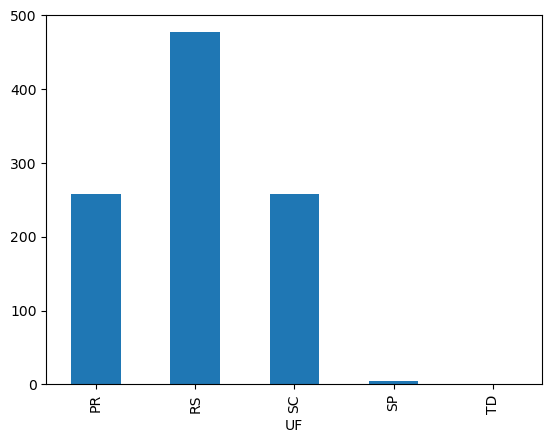

In [2389]:
#grafico para visualizar distribuição
groupedUF.plot.bar()

In [2390]:
#mudando valores que não existem pelo que mais aparece
maisApareceUF = groupedUF.idxmax()
dataset.loc[(dataset['UF'] != 'RS') & (dataset['UF'] != 'SC') & (dataset['UF'] != 'PR'), 'UF'] = maisApareceUF
#atualizando groupedUF
groupedUF = dataset.groupby(['UF']).size()
groupedUF


UF
PR    258
RS    482
SC    258
dtype: int64

<Axes: xlabel='genero'>

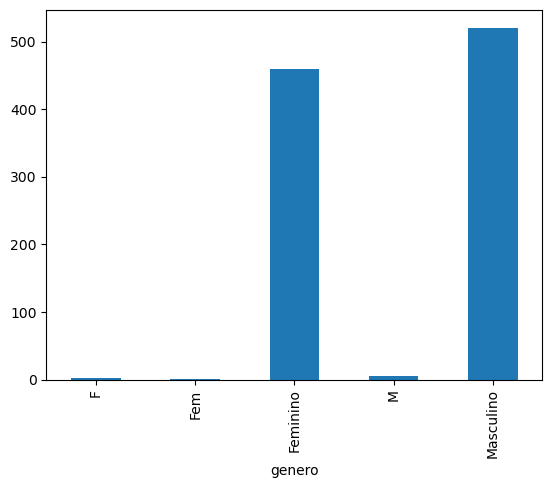

In [2391]:
groupGenero = dataset.groupby(['genero']).size()
groupGenero.plot.bar()

In [2392]:
#consertando problema do genero
dataset.loc[dataset['genero'] == 'M', 'genero'] = 'Masculino'
dataset.loc[dataset['genero'].isin(['Fem', 'F']), 'genero'] = 'Feminino'

groupGenero = dataset.groupby(['genero']).size()
groupGenero

genero
Feminino     463
Masculino    527
dtype: int64

In [2393]:
dataset['idade'].describe()

count    998.000000
mean      38.907816
std       11.406570
min      -20.000000
25%       32.000000
50%       37.000000
75%       44.000000
max      140.000000
Name: idade, dtype: float64

In [2394]:
#substiituindo idades inválidas para o modelo pela idade média do banco
dataset.loc[(dataset['idade'] <= 0) | (dataset['idade'] > 120), 'idade'] = dataset['idade'].median().__trunc__()
dataset['idade'].describe()

count    998.000000
mean      39.094188
std       10.314179
min       18.000000
25%       32.000000
50%       37.000000
75%       44.000000
max       82.000000
Name: idade, dtype: float64

<Axes: ylabel='score'>

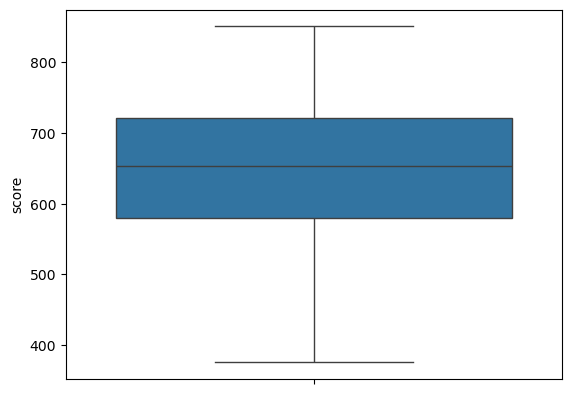

In [2395]:
#visualização score. A linha no meio do srn.boxplot é a mediana
groupedScore = dataset.groupby('score').size()
srn.boxplot(dataset['score'])

<Axes: xlabel='score', ylabel='Count'>

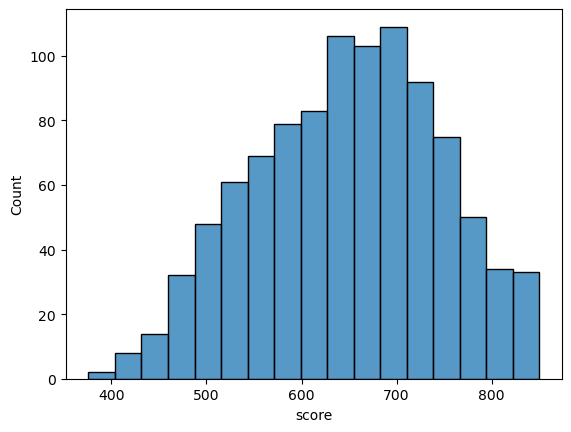

In [2396]:
srn.histplot(dataset['score'])

In [2397]:
#verificando onde valores estão nulos
dataset.isnull().sum()

id                0
score             0
UF                0
genero            8
idade             0
patrimonio        0
saldo             0
produtos          0
temCartCredito    0
ativo             0
salario           7
saiu              0
dtype: int64

In [2398]:
#substituindo valores nulos em genero pelo valor que mais aparece em genero
dataset['genero'].describe().__getitem__('top')
dataset.fillna({'genero': dataset['genero'].describe().__getitem__('top')}, inplace=True)
dataset.isnull().sum()

id                0
score             0
UF                0
genero            0
idade             0
patrimonio        0
saldo             0
produtos          0
temCartCredito    0
ativo             0
salario           7
saiu              0
dtype: int64

In [2399]:
#substituindo valores nulos em salario pela mediana de salario
medianaSalario = sts.median(dataset['salario'])
dataset.fillna({'salario': medianaSalario}, inplace=True)
dataset.isnull().sum()


id                0
score             0
UF                0
genero            0
idade             0
patrimonio        0
saldo             0
produtos          0
temCartCredito    0
ativo             0
salario           0
saiu              0
dtype: int64

In [2400]:
#verificando outliers nos salarios com base no desvio padrão
desvioSalario = dataset['salario'].std()
dataset.loc[dataset['salario'] > 2*desvioSalario]


,id,score,UF,genero,idade,patrimonio,saldo,produtos,temCartCredito,ativo,salario,saiu
7,8,376,PR,Feminino,29,4,11504674,4,True,False,1.193469e+10,True
116,118,668,PR,Feminino,37,6,1678644,1,True,False,1.156383e+10,False
170,172,484,RS,Feminino,29,4,13011439,1,True,False,1.640179e+09,False
230,232,673,RS,Masculino,72,1,0,2,False,True,1.119812e+09,False


In [2401]:
#definindo que salarios 2 vezes acima do desvio padrão devem ser alterados pela mediana
dataset.loc[dataset['salario'] > 2*desvioSalario, 'salario'] = dataset['salario'].median()
dataset.loc[dataset['salario'] > 2*desvioSalario]


,id,score,UF,genero,idade,patrimonio,saldo,produtos,temCartCredito,ativo,salario,saiu
